In [127]:
! cd ~ && make jetlog

In [128]:
# read text files in logs directory and print out the results
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

LOG_DIRECTORY = './logs/'
START_TIME = 3650

In [129]:
# Get the latest log file
def get_latest_log_file(startwith: str=None):
    # get the list of files in the directory
    files = os.listdir(LOG_DIRECTORY)    
    # sort the files
    files.sort()
    # get the latest file that starts with 'c5'
    latest_file = ''
    if startwith is not None:
        for file in files:
            if file.startswith(startwith):
                latest_file = file
    else:
        latest_file = files[-1]
    # return the latest file
    print('Reading log file: ' + latest_file)
    return LOG_DIRECTORY + latest_file

def read_log_file(file_name: str):
    with open(file_name, 'r') as f:
        lines = f.readlines()
    return lines
        
with open(get_latest_log_file('c5'), 'r') as f:
    lines = f.readlines()
display(lines)

Reading log file: c5_2024-01-26_08-34-04.yaml


['\x1b[ INFO] [1706276046.016130318]: using default namespace\x1b\n',
 '\x1b[ INFO] [1706276046.051652230]: Waiting for FCU connection\x1b\n',
 '\x1b[ INFO] [1706276046.299756120, 3909.471000000]: Connected to FCU\x1b\n',
 '\x1b[ INFO] [1706276046.299826138, 3909.471000000]: Waiting for user to set mode to GUIDED\x1b\n',
 '\x1b[ INFO] [1706276046.299841499, 3909.471000000]: Mode set to GUIDED. Mission starting\x1b\n',
 '\x1b-------------------------------------------------\x1b\n',
 'Current Time:    3909.638000000\n',
 'Drone State:     -7.48965, -4.61729, 1.029, -85.2294, 0.200998, nan\n',
 'Drone Orien:     0.0273209, -0.327412, -85.2294\n',
 'Marker State:    -6.87642, -4.58783, 0.1, 90, 0.224577\n',
 'Intersect State: -6.97983, -4.58783, 1, -86.6929, 2\n',
 'Destination xyz: -4.58783, 6.97983, 1\n',
 'Mode: Targeting\n',
 '\x1b-------------------------------------------------\x1b\n',
 'Current Time:    3909.721000000\n',
 'Drone State:     -7.48965, -4.61729, 1.029, -85.2294, 0.200

In [130]:
# parse the log file
# log file has multiple segments, each segment starts with a line with the following format "Current Time: "

# divide the log file into segments
# parse each segment

# remove red lines from the log file
lines = [line.strip() for line in lines if not line.startswith('\x1b') and len(line.strip()) > 0]
lines

['Current Time:    3909.638000000',
 'Drone State:     -7.48965, -4.61729, 1.029, -85.2294, 0.200998, nan',
 'Drone Orien:     0.0273209, -0.327412, -85.2294',
 'Marker State:    -6.87642, -4.58783, 0.1, 90, 0.224577',
 'Intersect State: -6.97983, -4.58783, 1, -86.6929, 2',
 'Destination xyz: -4.58783, 6.97983, 1',
 'Mode: Targeting',
 'Current Time:    3909.721000000',
 'Drone State:     -7.48965, -4.61729, 1.029, -85.2294, 0.200998, nan',
 'Drone Orien:     0.0273209, -0.327412, -85.2294',
 'Marker State:    -6.84404, -4.59416, 0.101862, 0, 0.323412',
 'Intersect State: -6.84404, -4.75085, 1, -101.688, 2',
 'Destination xyz: -4.75085, 6.84404, 1',
 'Mode: Targeting',
 'Current Time:    3909.805000000',
 'Drone State:     -7.44527, -4.6082, 1.03, -85.2548, 0.181108, -inf',
 'Drone Orien:     0.0626125, -0.309866, -85.2548',
 'Marker State:    -6.78248, -4.58767, 0.100727, -30, 0.412936',
 'Intersect State: -6.6798, -4.76552, 1, -101.613, 2',
 'Destination xyz: -4.76552, 6.6798, 1',
 '

In [131]:
pairs = [((s:=line.split(':'))[0].strip(), s[1].strip()) for line in lines]
pairs

[('Current Time', '3909.638000000'),
 ('Drone State', '-7.48965, -4.61729, 1.029, -85.2294, 0.200998, nan'),
 ('Drone Orien', '0.0273209, -0.327412, -85.2294'),
 ('Marker State', '-6.87642, -4.58783, 0.1, 90, 0.224577'),
 ('Intersect State', '-6.97983, -4.58783, 1, -86.6929, 2'),
 ('Destination xyz', '-4.58783, 6.97983, 1'),
 ('Mode', 'Targeting'),
 ('Current Time', '3909.721000000'),
 ('Drone State', '-7.48965, -4.61729, 1.029, -85.2294, 0.200998, nan'),
 ('Drone Orien', '0.0273209, -0.327412, -85.2294'),
 ('Marker State', '-6.84404, -4.59416, 0.101862, 0, 0.323412'),
 ('Intersect State', '-6.84404, -4.75085, 1, -101.688, 2'),
 ('Destination xyz', '-4.75085, 6.84404, 1'),
 ('Mode', 'Targeting'),
 ('Current Time', '3909.805000000'),
 ('Drone State', '-7.44527, -4.6082, 1.03, -85.2548, 0.181108, -inf'),
 ('Drone Orien', '0.0626125, -0.309866, -85.2548'),
 ('Marker State', '-6.78248, -4.58767, 0.100727, -30, 0.412936'),
 ('Intersect State', '-6.6798, -4.76552, 1, -101.613, 2'),
 ('Destin

In [132]:
# Convert list of tuples to dictionary

frames = [] # list of dictionaries

for k,v in pairs:
    k = k.strip().replace(' ', '_').lower()
    if k == 'current_time': 
        frames.append({
            k:float(v)
        })
    else:
        comps = v.split(',')
        if len(comps) == 1:
            frames[-1][k] = v.strip()
        else:
            for i, comp in enumerate(comps,1):
                comp = comp.strip()
                if comp.strip() == 'nan': 
                    continue
                k_comp = k + '_' + str(i)
                try: frames[-1][k_comp] = float(comp)
                except: frames[-1][k_comp] = comp
        
frames

[{'current_time': 3909.638,
  'drone_state_1': -7.48965,
  'drone_state_2': -4.61729,
  'drone_state_3': 1.029,
  'drone_state_4': -85.2294,
  'drone_state_5': 0.200998,
  'drone_orien_1': 0.0273209,
  'drone_orien_2': -0.327412,
  'drone_orien_3': -85.2294,
  'marker_state_1': -6.87642,
  'marker_state_2': -4.58783,
  'marker_state_3': 0.1,
  'marker_state_4': 90.0,
  'marker_state_5': 0.224577,
  'intersect_state_1': -6.97983,
  'intersect_state_2': -4.58783,
  'intersect_state_3': 1.0,
  'intersect_state_4': -86.6929,
  'intersect_state_5': 2.0,
  'destination_xyz_1': -4.58783,
  'destination_xyz_2': 6.97983,
  'destination_xyz_3': 1.0,
  'mode': 'Targeting'},
 {'current_time': 3909.721,
  'drone_state_1': -7.48965,
  'drone_state_2': -4.61729,
  'drone_state_3': 1.029,
  'drone_state_4': -85.2294,
  'drone_state_5': 0.200998,
  'drone_orien_1': 0.0273209,
  'drone_orien_2': -0.327412,
  'drone_orien_3': -85.2294,
  'marker_state_1': -6.84404,
  'marker_state_2': -4.59416,
  'marker

In [133]:
iris_data = pd.DataFrame(frames)
iris_data.rename(columns={
    'current_time':'time',
    
    # Drone State
    'drone_state_1': 'drone_x',
    'drone_state_2': 'drone_y',
    'drone_state_3': 'drone_z',
    'drone_state_4': 'drone_hdg',
    'drone_state_5': 'drone_spd',
    'drone_state_6': 'drone_acc',
    'drone_orien_1': 'drone_roll',
    'drone_orien_1': 'drone_roll',
    'drone_orien_2': 'drone_pitch',
    'drone_orien_3': 'drone_yaw',
    
    # Marker State
    'marker_state_1': 'marker_x',
    'marker_state_2': 'marker_y',
    'marker_state_3': 'marker_z',
    'marker_state_4': 'marker_hdg',
    'marker_state_5': 'marker_spd',
    
    # intersection State
    'intersect_state_1': 'intersect_x',
    'intersect_state_2': 'intersect_y',
    'intersect_state_3': 'intersect_z',
    'intersect_state_4': 'intersect_hdg',
    'intersect_state_5': 'intersect_spd',
    
    # Search State
    'search_state_1': 'search_x',
    'search_state_2': 'search_y',
    'search_state_3': 'search_z',
    'search_state_4': 'search_hdg',
    'search_state_5': 'search_spd',
}, inplace=True)
iris_data.set_index('time', inplace=True)
iris_data

drone_x  drone_y  drone_z  drone_hdg  drone_spd  drone_roll  \
time                                                                    
3909.638 -7.48965 -4.61729    1.029   -85.2294   0.200998    0.027321   
3909.721 -7.48965 -4.61729    1.029   -85.2294   0.200998    0.027321   
3909.805 -7.44527 -4.60820    1.030   -85.2548   0.181108    0.062613   
3909.888 -7.44527 -4.60820    1.030   -85.2548   0.181108    0.062613   
3909.971 -7.44527 -4.60820    1.030   -85.2548   0.181108    0.062613   
...           ...      ...      ...        ...        ...         ...   
4069.805  7.43417 -4.65364    1.031    86.4834   0.270740    0.141778   
4069.888  7.36760 -4.65364    1.031    86.6684   0.291548    0.105779   
4069.971  7.36760 -4.65364    1.031    86.6684   0.291548    0.105779   
4070.055  7.36760 -4.65364    1.031    86.6684   0.291548    0.105779   
4070.134  7.28993 -4.64455    1.031    87.3703   0.311448    0.040379   

          drone_pitch  drone_yaw  marker_x  marker_y  ...  intersect_x  \
time                                                  ...                
3909.638    -0.327412   -85.2294  -6.87642  -4.58783  ...     -6.97983   
3909.721    -0.327412   -85.2294  -6.84404  -4.59416  ...     -6.84404   
3909.805    -0.309866   -85.2548  -6.78248  -4.58767  ...     -6.67980   
3909.888    -0.309866   -85.2548       NaN       NaN  ...          NaN   
3909.971    -0.309866   -85.2548  -6.74585  -4.59069  ...     -6.59993   
...               ...        ...       ...       ...  ...          ...   
4069.805     0.586306    86.4834   6.79539  -4.59700  ...      6.61143   
4069.888     0.508814    86.6684   6.70470  -4.60098  ...      6.49422   
4069.971     0.508814    86.6684   6.69935  -4.60242  ...      6.49476   
4070.055     0.508814    86.6684   6.69419  -4.60364  ...      6.48895   
4070.134     0.567753    87.3703   6.60301  -4.60339  ...      6.37674   

          intersect_y  intersect_z  intersect_hdg  intersect_spd  \
time                                                               
3909.638     -4.58783          1.0       -86.6929            2.0   
3909.721     -4.75085          1.0      -101.6880            2.0   
3909.805     -4.76552          1.0      -101.6130            2.0   
3909.888          NaN          NaN            NaN            NaN   
3909.971     -4.73661          1.0       -98.6370            2.0   
...               ...          ...            ...            ...   
4069.805     -4.59700          1.0        86.0619            2.0   
4069.888     -4.60098          1.0        86.5492            2.0   
4069.971     -4.60242          1.0        86.6414            2.0   
4070.055     -4.60364          1.0        86.7428            2.0   
4070.134     -4.60339          1.0        87.4189            2.0   

          destination_xyz_1  destination_xyz_2  destination_xyz_3  \
time                                                                
3909.638           -4.58783            6.97983                1.0   
3909.721           -4.75085            6.84404                1.0   
3909.805           -4.76552            6.67980                1.0   
3909.888                NaN                NaN                NaN   
3909.971           -4.73661            6.59993                1.0   
...                     ...                ...                ...   
4069.805           -4.59700           -6.61143                1.0   
4069.888           -4.60098           -6.49422                1.0   
4069.971           -4.60242           -6.49476                1.0   
4070.055           -4.60364           -6.48895                1.0   
4070.134           -4.60339           -6.37674                1.0   

                         mode  drone_acc  
time                                      
3909.638            Targeting        NaN  
3909.721            Targeting        NaN  
3909.805            Targeting       -inf  
3909.888  Lost Visual Contact       -inf  
3909.971            Targeting       -inf  
...          

In [134]:
iris_data.keys()

Index(['drone_x', 'drone_y', 'drone_z', 'drone_hdg', 'drone_spd', 'drone_roll',
       'drone_pitch', 'drone_yaw', 'marker_x', 'marker_y', 'marker_z',
       'marker_hdg', 'marker_spd', 'intersect_x', 'intersect_y', 'intersect_z',
       'intersect_hdg', 'intersect_spd', 'destination_xyz_1',
       'destination_xyz_2', 'destination_xyz_3', 'mode', 'drone_acc'],
      dtype='object')

In [135]:
iris_data = iris_data[START_TIME:]

Text(0, 0.5, 'X Position (m)')

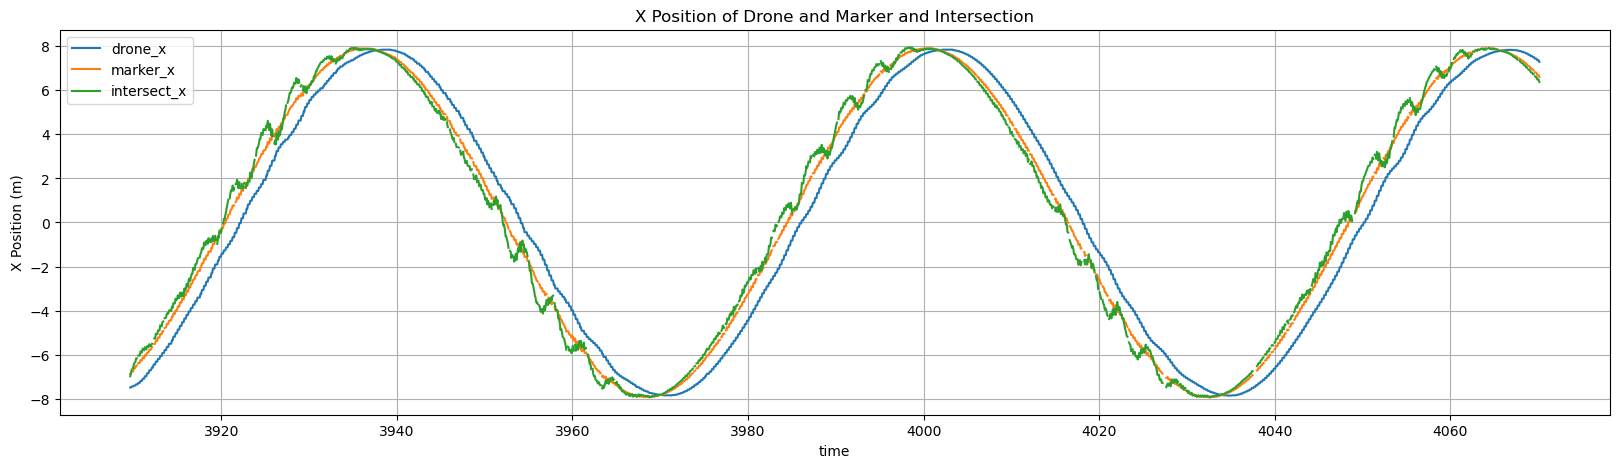

In [136]:
# plot Drone_State_1 and Marker_State_1 together over time
iris_data[['drone_x', 'marker_x', 'intersect_x']].plot(figsize=(20,5))
plt.grid()
plt.title('X Position of Drone and Marker and Intersection')
plt.ylabel('X Position (m)')

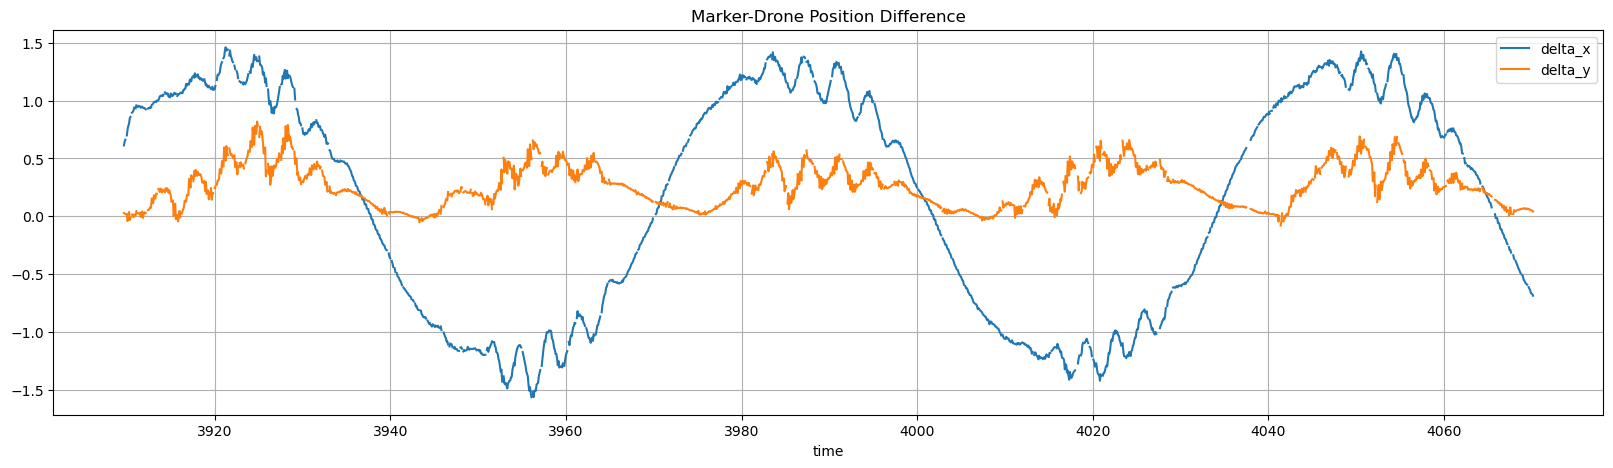

In [137]:
# plot the difference between the marker and drone positions
(iris_data['marker_x']-iris_data['drone_x']).plot(figsize=(20,5))
(iris_data['marker_y']-iris_data['drone_y']).plot(figsize=(20,5))
plt.legend(['delta_x', 'delta_y'])
plt.title('Marker-Drone Position Difference')
plt.grid()

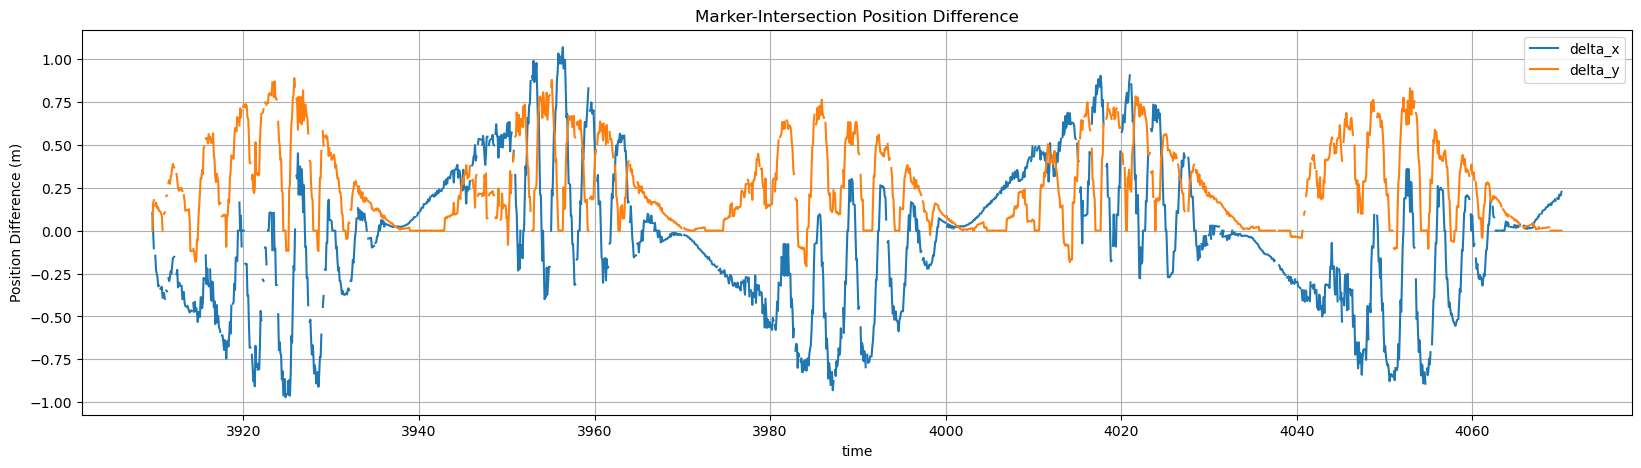

In [138]:
# plot the difference between the marker and drone positions
(iris_data['marker_x']-iris_data['intersect_x']).plot(figsize=(20,5))
(iris_data['marker_y']-iris_data['intersect_y']).plot(figsize=(20,5))
plt.legend(['delta_x', 'delta_y'])
plt.title('Marker-Intersection Position Difference')
plt.ylabel('Position Difference (m)')
plt.grid()

Text(0, 0.5, 'Speed (m/s)')

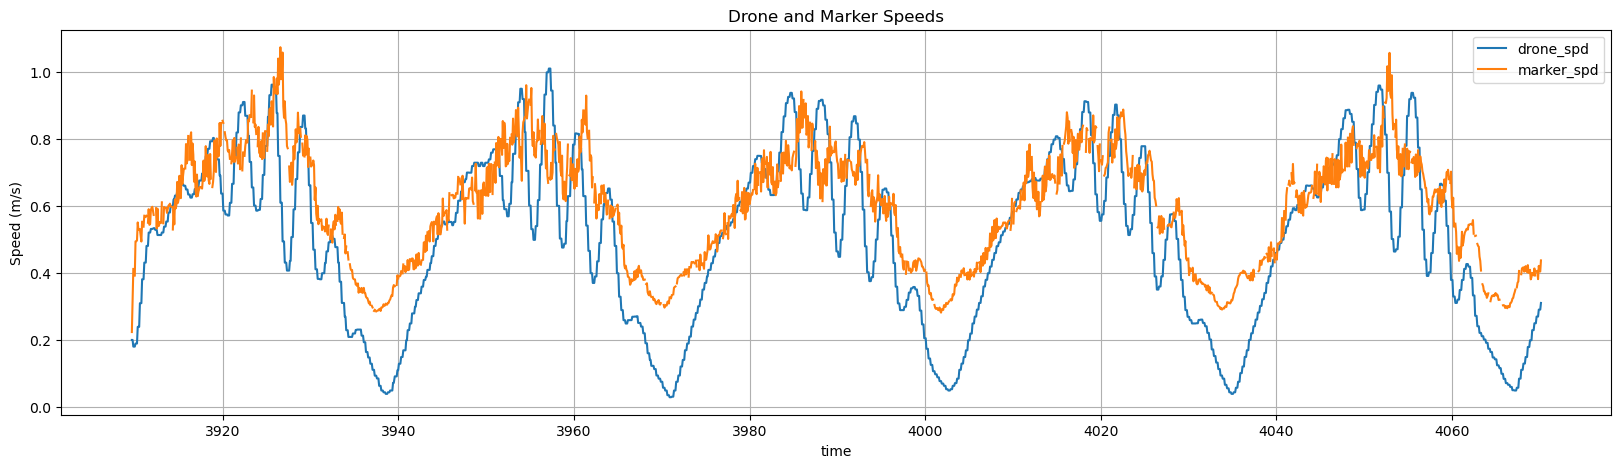

In [139]:

# plot marker velocity and drone velocity
iris_data[['drone_spd', 'marker_spd']].plot(figsize=(20,5))
plt.grid()
plt.title('Drone and Marker Speeds')
plt.ylabel('Speed (m/s)')

Text(0, 0.5, 'Heading (deg)')

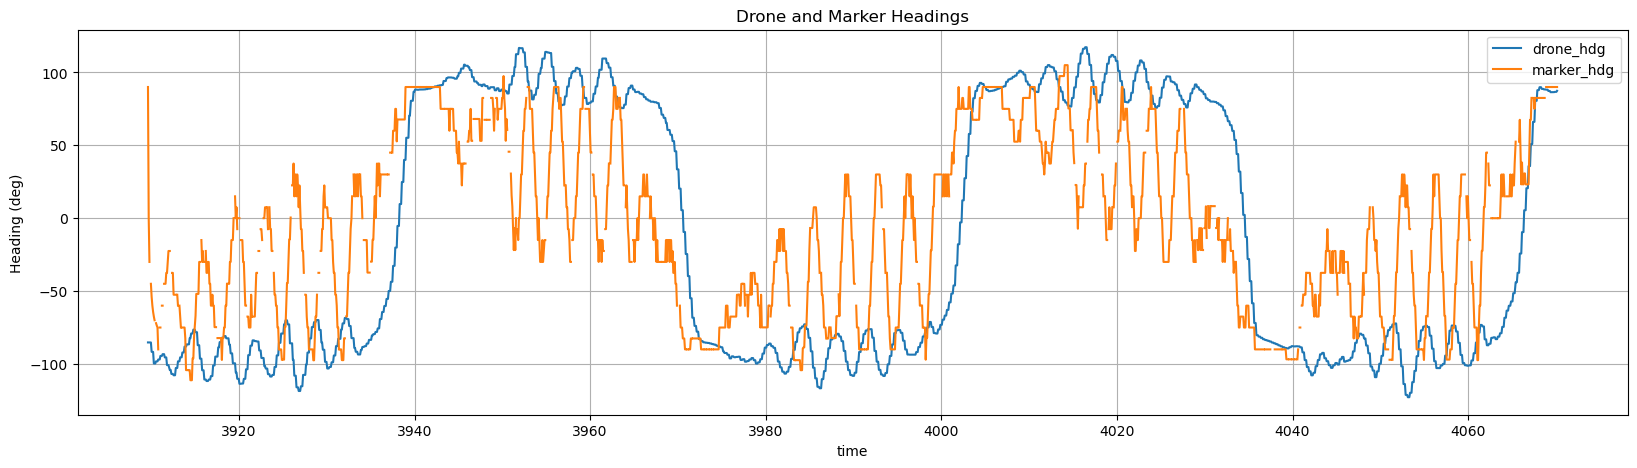

In [140]:
# plot marker heading and drone heading
iris_data[['drone_hdg', 'marker_hdg']].plot(figsize=(20,5))
plt.grid()
plt.title('Drone and Marker Headings')
plt.ylabel('Heading (deg)')

/var/folders/s1/62dlm7md4bq9374rr0nn2c6c0000gn/T/ipykernel_2784/3361440850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data['drone_mode_int'] = iris_data['mode'].apply(lambda x: 0 if x == 'Scanning' else 1 if x == 'Searching' else 2)


Text(0.5, 1.0, 'Drone Mode')

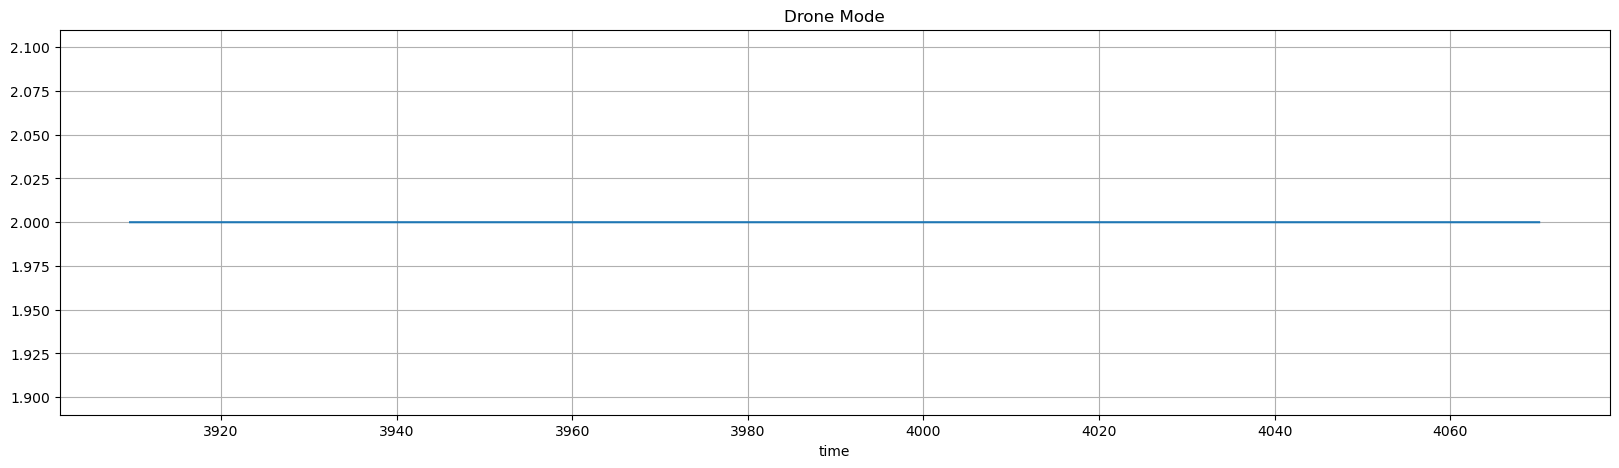

In [141]:
# plot value of 0 when drone is Scanning, and 1 when drone is Searching, and 2 when drone is Targeting
iris_data['drone_mode_int'] = iris_data['mode'].apply(lambda x: 0 if x == 'Scanning' else 1 if x == 'Searching' else 2)
iris_data['drone_mode_int'].plot(figsize=(20,5))
plt.grid()
plt.title('Drone Mode')

Text(0, 0.5, 'Acceleration (m/s^2)')

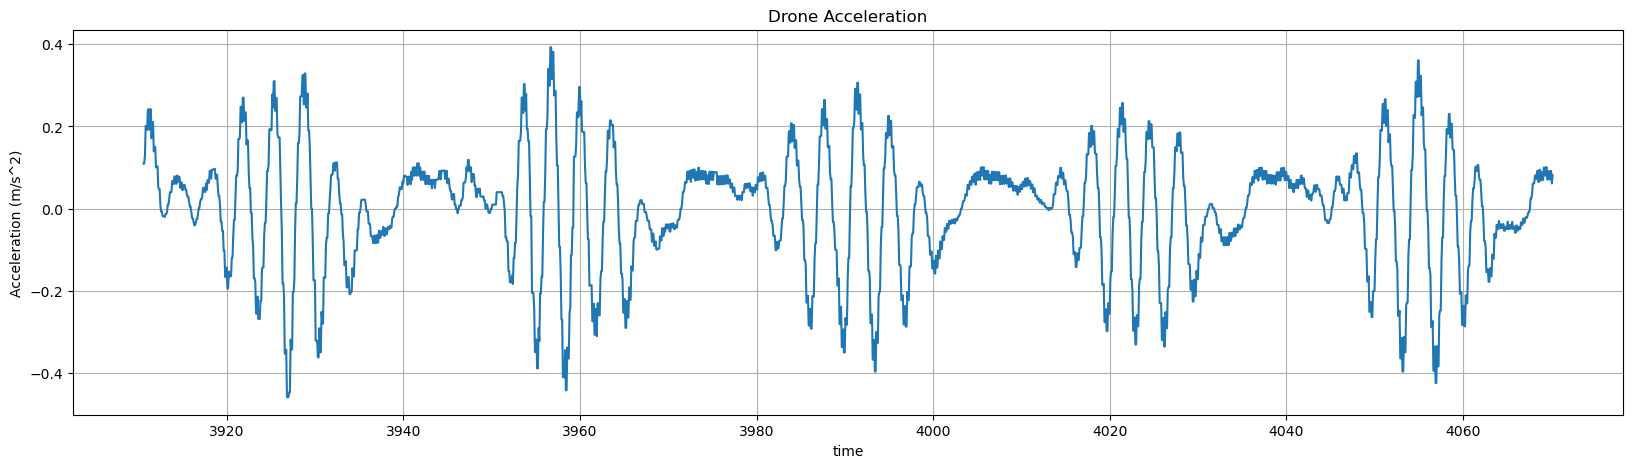

In [142]:
# plot drone acceleration
iris_data['drone_acc'].plot(figsize=(20,5))
plt.grid()
plt.title('Drone Acceleration')
plt.ylabel('Acceleration (m/s^2)')

Text(0, 0.5, 'Angle (deg)')

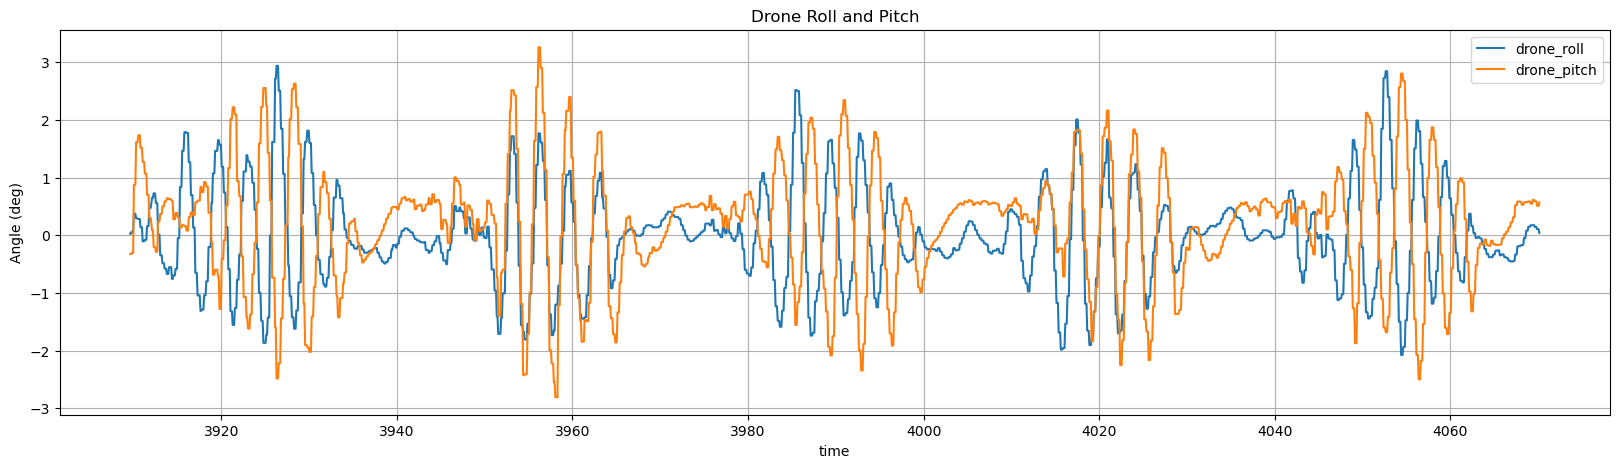

In [143]:
# plot drone roll, pitch, and yaw
iris_data[['drone_roll', 'drone_pitch']].plot(figsize=(20,5))
plt.grid()
plt.title('Drone Roll and Pitch')
plt.ylabel('Angle (deg)')

Text(0, 0.5, 'Speed (m/s)')

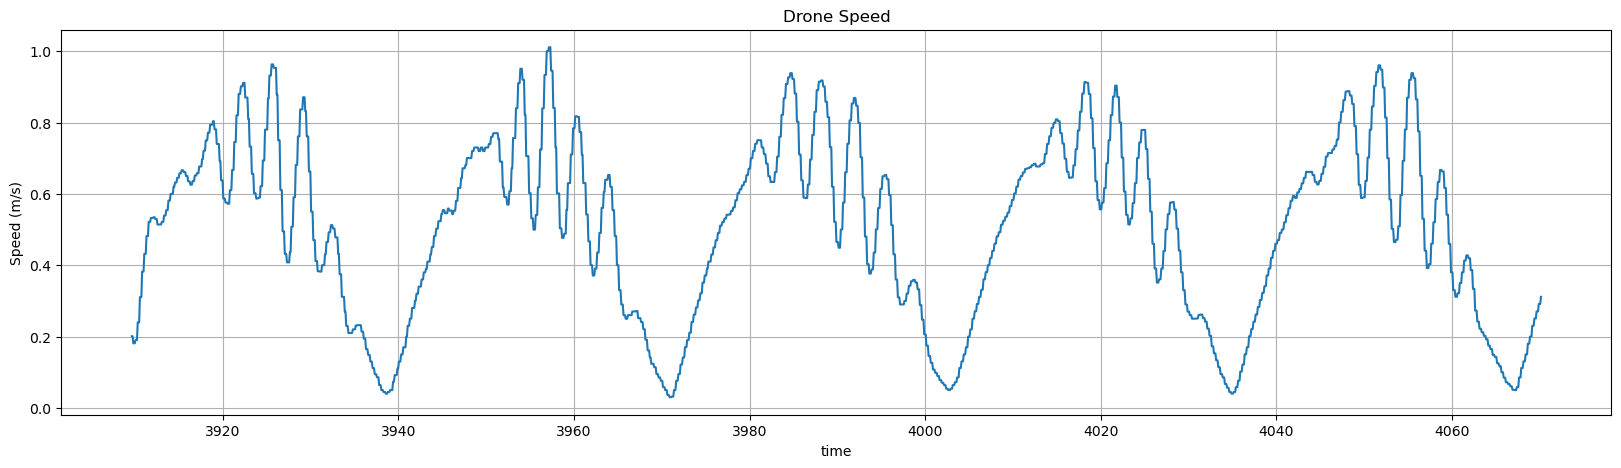

In [144]:
iris_data['drone_spd'].plot(figsize=(20,5))
plt.grid()
plt.title('Drone Speed')
plt.ylabel('Speed (m/s)')

/var/folders/s1/62dlm7md4bq9374rr0nn2c6c0000gn/T/ipykernel_2784/309686773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data['distance_to_marker'] = ((iris_data['marker_x']-iris_data['drone_x'])**2 + (iris_data['marker_y']-iris_data['drone_y'])**2)**0.5
/var/folders/s1/62dlm7md4bq9374rr0nn2c6c0000gn/T/ipykernel_2784/309686773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data['distance_to_intersect'] = ((iris_data['intersect_x']-iris_data['drone_x'])**2 + (iris_data['intersect_y']-iris

Text(0, 0.5, 'Distance (m)')

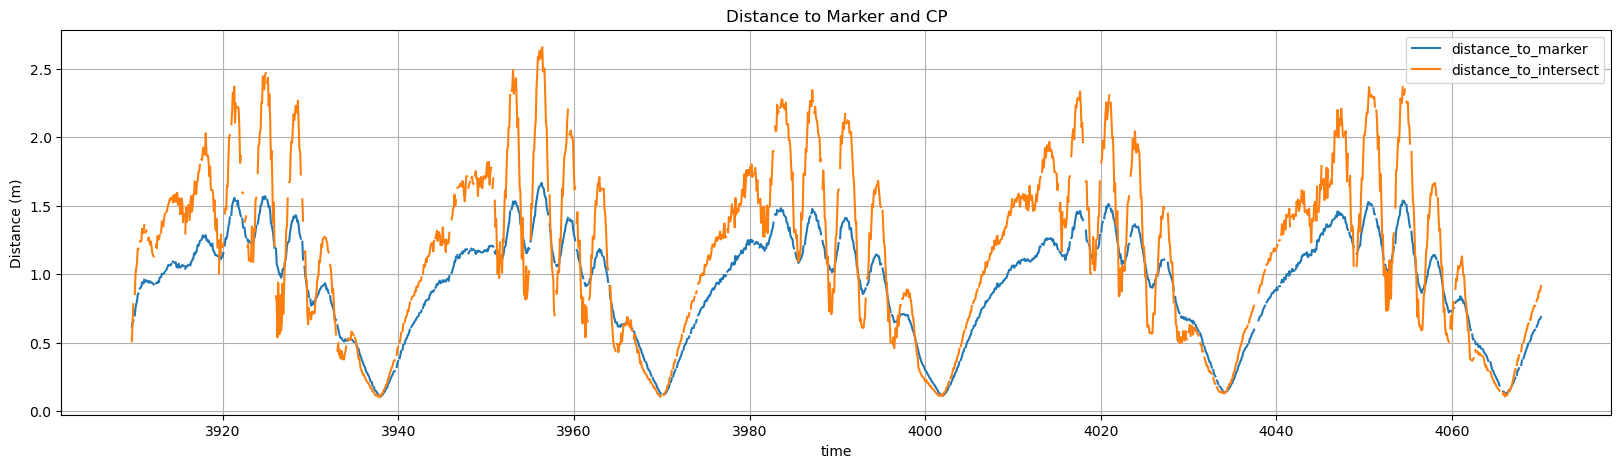

In [145]:
# plot distance to marker
iris_data['distance_to_marker'] = ((iris_data['marker_x']-iris_data['drone_x'])**2 + (iris_data['marker_y']-iris_data['drone_y'])**2)**0.5
iris_data['distance_to_marker'].plot(figsize=(20,5))
iris_data['distance_to_intersect'] = ((iris_data['intersect_x']-iris_data['drone_x'])**2 + (iris_data['intersect_y']-iris_data['drone_y'])**2)**0.5
iris_data['distance_to_intersect'].plot(figsize=(20,5))
plt.grid()
plt.legend(['distance_to_marker', 'distance_to_intersect'])
plt.title('Distance to Marker and CP')
plt.ylabel('Distance (m)')

In [146]:
import yaml

with open(get_latest_log_file('gzstate'), 'r') as file:
    gzstate = yaml.safe_load(file)
    
gzstate

Reading log file: gzstate_2024-01-26_08-34-05.yaml


{3909.558: {'iris_position': [7.485574298843341,
   4.590368223458974,
   0.9816086926023961],
  'iris_orientation': [-0.003115256605189264,
   -0.0001138893792588229,
   -0.9988865700683861,
   0.04707337190502089],
  'iris_acceleration': [-0.1961015762360867,
   -0.03251245700193914,
   0.001690772244495566],
  'marker_4_position': [6.734241083812549, 4.57, 0.03],
  'marker_4_orientation': [0, 0, 0, 1],
  'marker_4_acceleration': [0, 0, 0]},
 3909.662: {'iris_position': [7.465060285029945,
   4.58689697534192,
   0.981757749153504],
  'iris_orientation': [-0.003356160487957947,
   -0.0002499723186249292,
   -0.9988739038015547,
   0.04732439122547266],
  'iris_acceleration': [-0.1892128052415631,
   -0.03189402801531466,
   0.00115047346501002],
  'marker_4_position': [6.675403023437563, 4.57, 0.03],
  'marker_4_orientation': [0, 0, 0, 1],
  'marker_4_acceleration': [0, 0, 0]},
 3909.779: {'iris_position': [7.444181864274893,
   4.583254915203498,
   0.9818724892325255],
  'iris_orie

In [147]:
df_gzstate = pd.DataFrame(gzstate).T
df_gzstate

iris_position  \
3909.558  [7.485574298843341, 4.590368223458974, 0.98160...   
3909.662  [7.465060285029945, 4.58689697534192, 0.981757...   
3909.779  [7.444181864274893, 4.583254915203498, 0.98187...   
3909.875  [7.428122691621684, 4.579701808607667, 0.98194...   
3909.999  [7.406380700813277, 4.576077327116988, 0.98199...   
...                                                     ...   
4069.603  [-7.431655234507495, 4.652022856529237, 0.9801...   
4069.727  [-7.395940287592367, 4.648720833417106, 0.9800...   
4069.856  [-7.358462022705869, 4.644967520054896, 0.9797...   
4069.975  [-7.322505283029439, 4.641125088805126, 0.9796...   
4070.112  [-7.280102247074125, 4.636428451742478, 0.9793...   

                                           iris_orientation  \
3909.558  [-0.003115256605189264, -0.0001138893792588229...   
3909.662  [-0.003356160487957947, -0.0002499723186249292...   
3909.779  [-0.0009811214144824724, -0.000257939030868109...   
3909.875  [0.003307096017783776, -0.002104031173756837, ...   
3909.999  [0.008568465095809281, -0.002925563985922845, ...   
...                                                     ...   
4069.603  [0.001375218413363083, 0.004391040730395757, -...   
4069.727  [0.001195243338363465, 0.003837011172744348, -...   
4069.856  [0.001050937298340365, 0.004027646399085548, -...   
4069.975  [0.0008224637196157518, 0.004161326077285613, ...   
4070.112  [0.0004868584233226011, 0.004491144796413483, ...   

                                          iris_acceleration  \
3909.558  [-0.1961015762360867, -0.03251245700193914, 0....   
3909.662  [-0.1892128052415631, -0.03189402801531466, 0....   
3909.779  [-0.1842091710141291, -0.03110374766373435, 0....   
3909.875  [-0.1867570051534353, -0.02896811812775684, 0....   
3909.999  [-0.2011325023111593, -0.02255360778613857, -1...   
...                                                     ...   
4069.603  [0.2791278892662714, -0.02405943755532539, -0....   
4069.727  [0.2886181949528085, -0.02739159736396438, -0....   
4069.856  [0.2981275668153756, -0.0302672618175216, -0.0...   
4069.975  [0.307131938973851, -0.03260869575065935, -0.0...   
4070.112  [0.3184312315820432, -0.03436529015217334, -0....   

                         marker_4_position marker_4_orientation  \
3909.558   [6.734241083812549, 4.57, 0.03]         [0, 0, 0, 1]   
3909.662   [6.675403023437563, 4.57, 0.03]         [0, 0, 0, 1]   
3909.779   [6.630538280007737, 4.57, 0.03]         [0, 0, 0, 1]   
3909.875   [6.585049418499985, 4.57, 0.03]         [0, 0, 0, 1]   
3909.999   [6.538942656929736, 4.57, 0.03]         [0, 0, 0, 1]   
...                                    ...                  ...   
4069.603  [-6.703232012437498, 4.57, 0.03]         [0, 0, 0, 1]   
4069.727  [-6.658762047257872, 4.57, 0.03]         [0, 0, 0, 1]   
4069.856  [-6.598492915726638, 4.57, 0.03]         [0, 0, 0, 1]   
4069.975  [-6.537122043945404, 4.57, 0.03]         [0, 0, 0, 1]   
4070.112   [-6.47466417091396, 4.57, 0.03]         [0, 0, 0, 1]   

         marker_4_acceleration  
3909.558             [0, 0, 0]  
3909.662             [0, 0, 0]  
3909.779             [0, 0, 0]  
3909.875             [0, 0, 0]  
3909.999             [0, 0, 0]  
...                        ...  
4069.603             [0, 0, 0]  
4069.727             [0, 0, 0]  
4069.856             [0, 0, 0]  
4069.975             [0, 0, 0]  
4070.112             [0, 0, 0]  

[1273 rows x 6 columns]

In [148]:
# unpack raw data
df_gzstate[['drone_x','drone_y','drone_z']] = df_gzstate['iris_position'].apply(pd.Series)
df_gzstate.drop(columns=['iris_position'], inplace=True)
df_gzstate[['marker_x','marker_y','marker_z']] = df_gzstate['marker_4_position'].apply(pd.Series)
df_gzstate.drop(columns=['marker_4_position'], inplace=True)
df_gzstate[['drone_acc_x', 'drone_acc_y', 'drone_acc_z']] = df_gzstate['iris_acceleration'].apply(pd.Series)
df_gzstate.drop(columns=['iris_acceleration'], inplace=True)
df_gzstate['drone_acc'] = (df_gzstate['drone_acc_x']**2 + df_gzstate['drone_acc_y']**2 + df_gzstate['drone_acc_z']**2)**0.5

# flip sign of x and y of drone
df_gzstate['drone_x'] = -df_gzstate['drone_x']
df_gzstate['drone_y'] = -df_gzstate['drone_y']

# flip sign of x and y of marker
df_gzstate['marker_x'] = -df_gzstate['marker_x']
df_gzstate['marker_y'] = -df_gzstate['marker_y']

In [149]:
# calculate velocity of drone
df_gzstate['drone_vel_x'] = df_gzstate['drone_x'].diff() / df_gzstate.index.to_series().diff()
df_gzstate['drone_vel_y'] = df_gzstate['drone_y'].diff() / df_gzstate.index.to_series().diff()
df_gzstate['drone_vel_z'] = df_gzstate['drone_z'].diff() / df_gzstate.index.to_series().diff()
df_gzstate['drone_vel'] = (df_gzstate['drone_vel_x']**2 + df_gzstate['drone_vel_y']**2 + df_gzstate['drone_vel_z']**2)**0.5

# calculate velocity of marker
df_gzstate['marker_vel_x'] = df_gzstate['marker_x'].diff() / df_gzstate.index.to_series().diff()
df_gzstate['marker_vel_y'] = df_gzstate['marker_y'].diff() / df_gzstate.index.to_series().diff()
df_gzstate['marker_vel_z'] = df_gzstate['marker_z'].diff() / df_gzstate.index.to_series().diff()
df_gzstate['marker_vel'] = (df_gzstate['marker_vel_x']**2 + df_gzstate['marker_vel_y']**2 + df_gzstate['marker_vel_z']**2)**0.5

# calculate marker heading using its velocity (x,y) and tangent
df_gzstate['marker_hdg'] = (np.degrees(np.arctan2(df_gzstate['marker_vel_y'], df_gzstate['marker_vel_x'])) + 180) % 360 - 180

# calculate drone heading using its velocity (x,y) and tangent
df_gzstate['drone_hdg'] = (np.degrees(np.arctan2(df_gzstate['drone_vel_y'], df_gzstate['drone_vel_x'])) + 180) % 360 - 180

df_gzstate

iris_orientation  \
3909.558  [-0.003115256605189264, -0.0001138893792588229...   
3909.662  [-0.003356160487957947, -0.0002499723186249292...   
3909.779  [-0.0009811214144824724, -0.000257939030868109...   
3909.875  [0.003307096017783776, -0.002104031173756837, ...   
3909.999  [0.008568465095809281, -0.002925563985922845, ...   
...                                                     ...   
4069.603  [0.001375218413363083, 0.004391040730395757, -...   
4069.727  [0.001195243338363465, 0.003837011172744348, -...   
4069.856  [0.001050937298340365, 0.004027646399085548, -...   
4069.975  [0.0008224637196157518, 0.004161326077285613, ...   
4070.112  [0.0004868584233226011, 0.004491144796413483, ...   

         marker_4_orientation marker_4_acceleration   drone_x   drone_y  \
3909.558         [0, 0, 0, 1]             [0, 0, 0] -7.485574 -4.590368   
3909.662         [0, 0, 0, 1]             [0, 0, 0] -7.465060 -4.586897   
3909.779         [0, 0, 0, 1]             [0, 0, 0] -7.444182 -4.583255   
3909.875         [0, 0, 0, 1]             [0, 0, 0] -7.428123 -4.579702   
3909.999         [0, 0, 0, 1]             [0, 0, 0] -7.406381 -4.576077   
...                       ...                   ...       ...       ...   
4069.603         [0, 0, 0, 1]             [0, 0, 0]  7.431655 -4.652023   
4069.727         [0, 0, 0, 1]             [0, 0, 0]  7.395940 -4.648721   
4069.856         [0, 0, 0, 1]             [0, 0, 0]  7.358462 -4.644968   
4069.975         [0, 0, 0, 1]             [0, 0, 0]  7.322505 -4.641125   
4070.112         [0, 0, 0, 1]             [0, 0, 0]  7.280102 -4.636428   

           drone_z  marker_x  marker_y  marker_z  drone_acc_x  ...  \
3909.558  0.981609 -6.734241     -4.57      0.03    -0.196102  ...   
3909.662  0.981758 -6.675403     -4.57      0.03    -0.189213  ...   
3909.779  0.981872 -6.630538     -4.57      0.03    -0.184209  ...   
3909.875  0.981943 -6.585049     -4.57      0.03    -0.186757  ...   
3909.999  0.981998 -6.538943     -4.57      0.03    -0.201133  ...   
...            ...       ...       ...       ...          ...  ...   
4069.603  0.980193  6.703232     -4.57      0.03     0.279128  ...   
4069.727  0.980000  6.658762     -4.57      0.03     0.288618  ...   
4069.856  0.979789  6.598493     -4.57      0.03     0.298128  ...   
4069.975  0.979605  6.537122     -4.57      0.03     0.307132  ...   
4070.112  0.979381  6.474664     -4.57      0.03     0.318431  ...   

          drone_vel_x  drone_vel_y  drone_vel_z  drone_vel  marker_vel_x  \
3909.558          NaN          NaN          NaN        NaN           NaN   
3909.662     0.197250     0.033377     0.001433   0.200059      0.565751   
3909.779     0.178448     0.031129     0.000981   0.181145      0.383459   
3909.875     0.167283     0.037012     0.000737   0.171330      0.473842   
3909.999     0.175339     0.029230     0.000438   0.177759      0.371829   
...               ...          ...          ...        ...           ...   
4069.603    -0.271566     0.022248    -0.001547   0.272480     -0.472105   
4069.727    -0.288024     0.026629    -0.001556   0.289256     -0.358629   
4069.856    -0.290529     0.029095    -0.001636   0.291987     -0.467203   
4069.975    -0.302157     0.032289    -0.001549   0.303882     -0.515722   
4070.112    -0.309511     0.034282    -0.001639   0.311408     -0.455897   

          marker_vel_y  marker_vel_z  marker_vel  marker_hdg   drone_hdg  
3909.558           NaN           NaN         NaN         NaN         NaN  
3909.662           0.0           0.0    0.565751         0.0    9.604242  
3909.779           0.0           0.0    0.383459         0.0    9.895186  
3909.875           0.0           0.0    0.473842         0.0   12.475764  
3909.999           0.0           0.0    0.371829         0.0    9.464415  
...                ...           ...         ...         ...         ...  
4069.603           0.0           0.0    0.472105      -180.0  175.316420  
4069.727           0.0         

In [150]:
# everytime df_gzstate['marker_x'] hit 8 or -8, plot a vertical line
target: float = 8.0
tolerance: float = 0.001
threshold: float = target - tolerance
turnpoints = df_gzstate['marker_x'].apply(lambda x: 1 if x >= threshold else -1 if x <= -threshold else 0)
turnpoints = turnpoints[(turnpoints == 1) | (turnpoints == -1)]

# for each turnpoint, plot a vertical line
# don't want to plot turnpoints that are too close to each other
def draw_turnpoint_lines():
    current_turnpoint_time = 0
    for turnpoint_time in turnpoints.index:
        if turnpoint_time - current_turnpoint_time < 2:
            continue
        current_turnpoint_time = turnpoint_time
        if turnpoints[turnpoint_time] == 1:
            # South, x = +8
            # plt.text(turnpoint_time+.3, 0, ' + 8', color='black', alpha=1)
            plt.axvline(turnpoint_time, color='black', linestyle='-', linewidth=1.5, alpha=0.5)
            
        elif turnpoints[turnpoint_time] == -1:
            # North, x = -8
            # plt.text(turnpoint_time+.3, 0, ' - 8', color='black', alpha=1)
            plt.axvline(turnpoint_time, color='black', linestyle='--', linewidth=1, alpha=0.5)
            

Text(0, 0.5, 'X Position (m)')

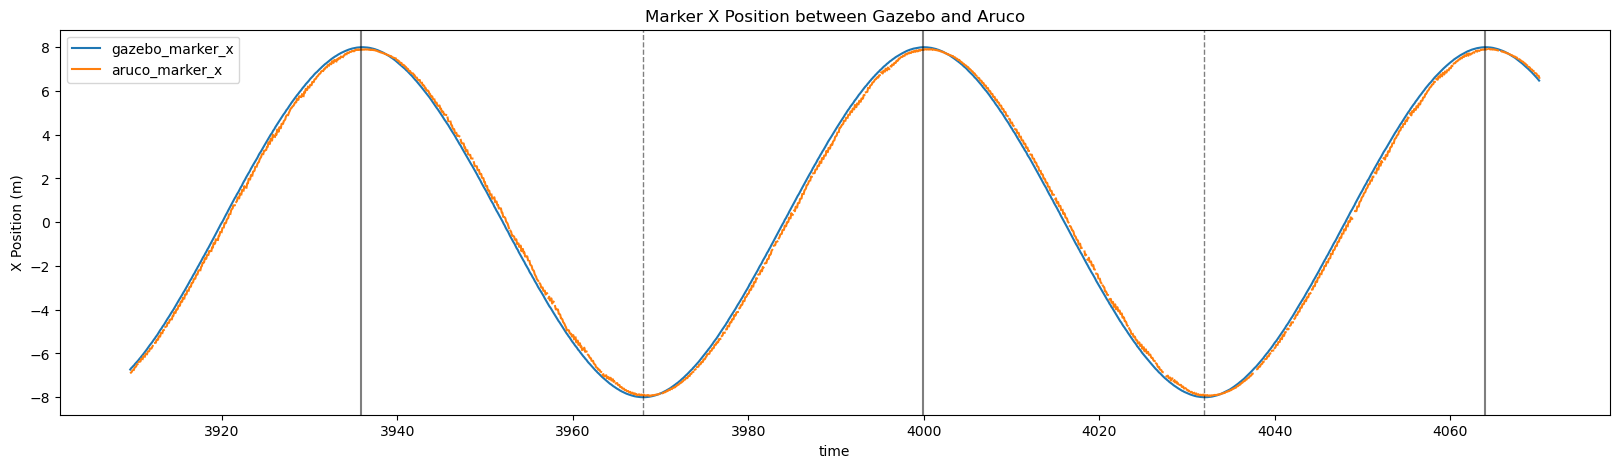

In [151]:
df_gzstate['marker_x'].plot(figsize=(20,5))
iris_data['marker_x'].plot(figsize=(20,5))
draw_turnpoint_lines()
plt.legend(['gazebo_marker_x', 'aruco_marker_x'])
plt.title('Marker X Position between Gazebo and Aruco')
plt.ylabel('X Position (m)')

Text(0, 0.5, 'Y Position (m)')

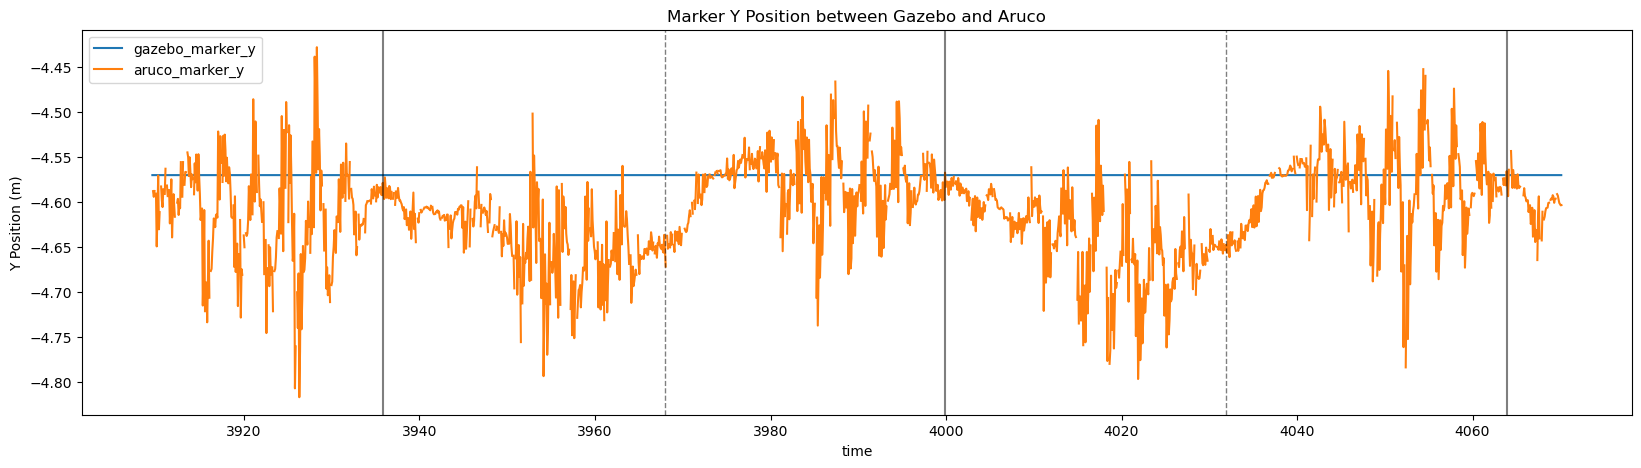

In [152]:
df_gzstate['marker_y'].plot(figsize=(20,5))
iris_data['marker_y'].plot(figsize=(20,5))
draw_turnpoint_lines()
plt.legend(['gazebo_marker_y', 'aruco_marker_y'])
plt.title('Marker Y Position between Gazebo and Aruco')
plt.ylabel('Y Position (m)')

Reading log file: c5_2024-01-26_08-34-04.yaml


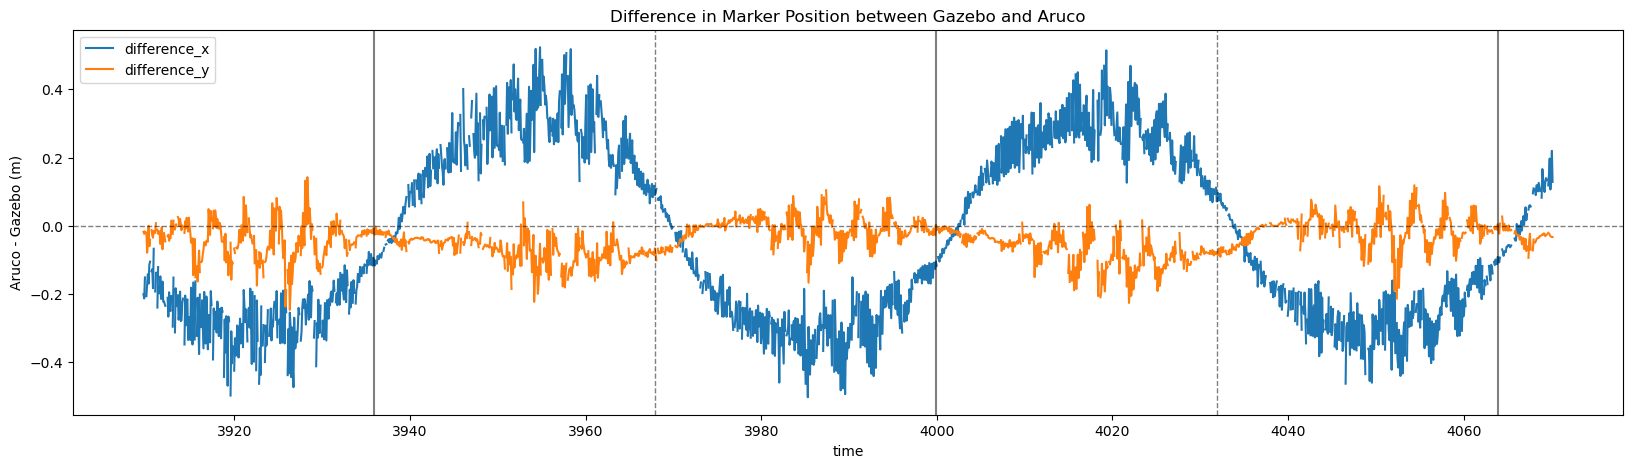

In [153]:
# culculate delta_x and delta_y between gzstate and aruco
gazebo_marker_x = df_gzstate['marker_x']
gazebo_marker_y = df_gzstate['marker_y']

# reindex gazebo_marker_x and gazebo_marker_y to match the index of iris_data (for easy calculation of difference)
gazebo_marker_x = gazebo_marker_x.reindex(iris_data.index, method='nearest')
gazebo_marker_y = gazebo_marker_y.reindex(iris_data.index, method='nearest')

# delta_x between gazebo and aruco
delta_x = iris_data['marker_x'] - gazebo_marker_x
delta_y = iris_data['marker_y'] - gazebo_marker_y 

# plot delta_x and delta_y
delta_x.plot(figsize=(20,5))
delta_y.plot(figsize=(20,5))
    
# draw a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)

draw_turnpoint_lines()

# plt.grid()
plt.legend(['difference_x', 'difference_y'])
plt.title('Difference in Marker Position between Gazebo and Aruco')
plt.ylabel('Aruco - Gazebo (m)');

# get the current time

# save the plot with time as the file name
file_name = get_latest_log_file('c5').rsplit('/',1)[-1].strip('.yaml')
plt.savefig(f'./figures/{file_name}-difference_in_marker_position.png', dpi=300, bbox_inches='tight')

Insight: The graph above shows the drone always think the marker closer to it than the marker actually is. This leads to the drone always trailing behind the marker.

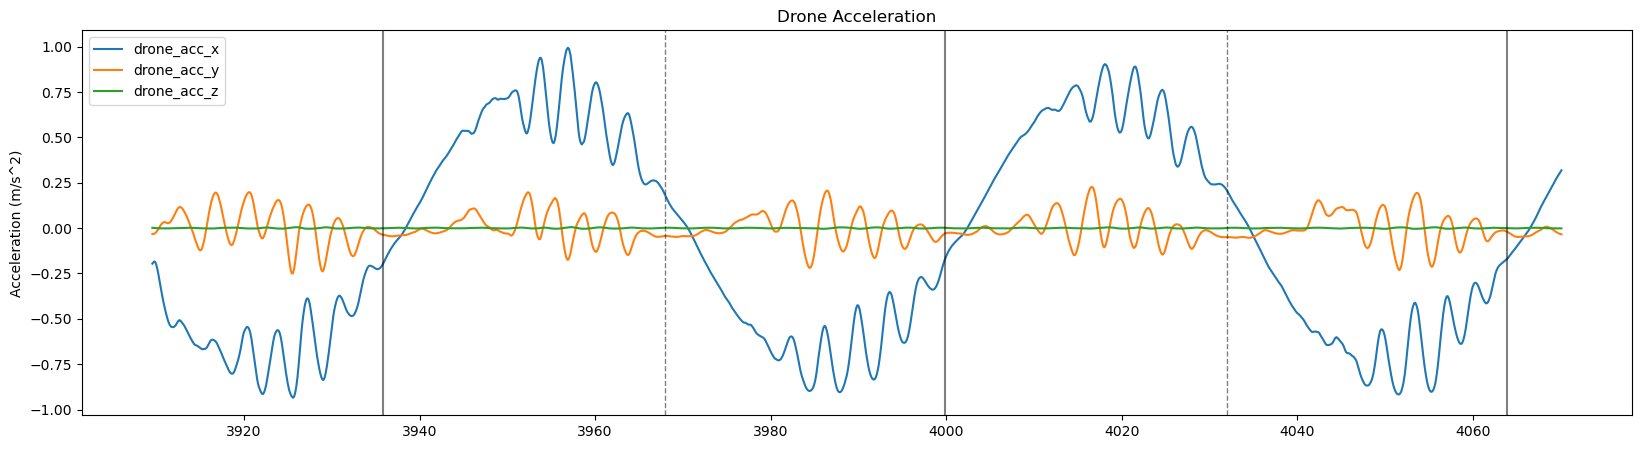

In [154]:
# plot drone acceleration
df_gzstate['drone_acc_x'].plot(figsize=(20,5))
df_gzstate['drone_acc_y'].plot(figsize=(20,5))
df_gzstate['drone_acc_z'].plot(figsize=(20,5))

draw_turnpoint_lines()
plt.title('Drone Acceleration')
plt.ylabel('Acceleration (m/s^2)')
plt.legend(['drone_acc_x', 'drone_acc_y', 'drone_acc_z']);

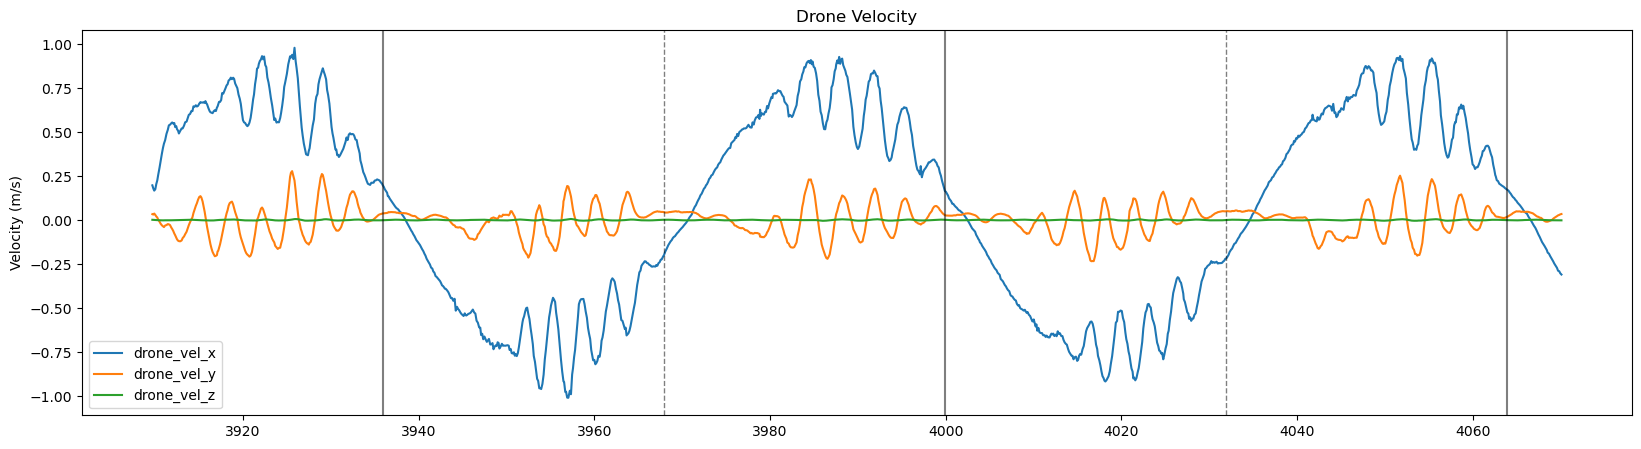

In [155]:
# plot drone velocity
df_gzstate['drone_vel_x'].plot(figsize=(20,5))
df_gzstate['drone_vel_y'].plot(figsize=(20,5))
df_gzstate['drone_vel_z'].plot(figsize=(20,5))

draw_turnpoint_lines()
plt.title('Drone Velocity')
plt.ylabel('Velocity (m/s)')
plt.legend(['drone_vel_x', 'drone_vel_y', 'drone_vel_z']);

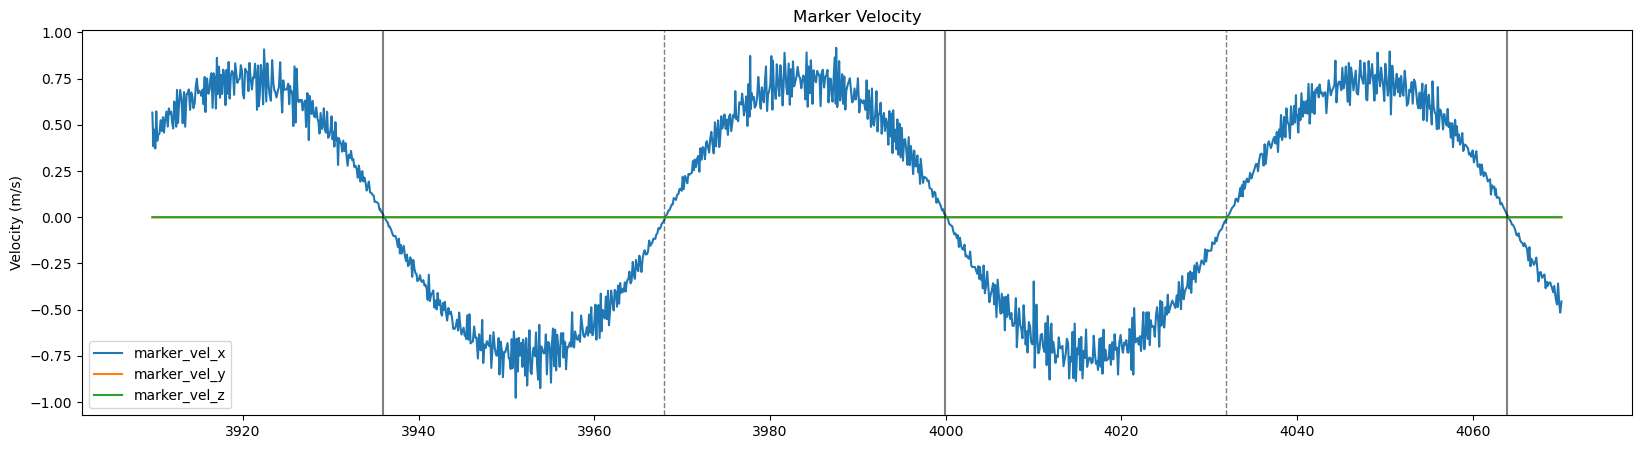

In [156]:
# plot marker velocity
df_gzstate['marker_vel_x'].plot(figsize=(20,5))
df_gzstate['marker_vel_y'].plot(figsize=(20,5))
df_gzstate['marker_vel_z'].plot(figsize=(20,5))

draw_turnpoint_lines()
plt.title('Marker Velocity')
plt.ylabel('Velocity (m/s)')
plt.legend(['marker_vel_x', 'marker_vel_y', 'marker_vel_z']);

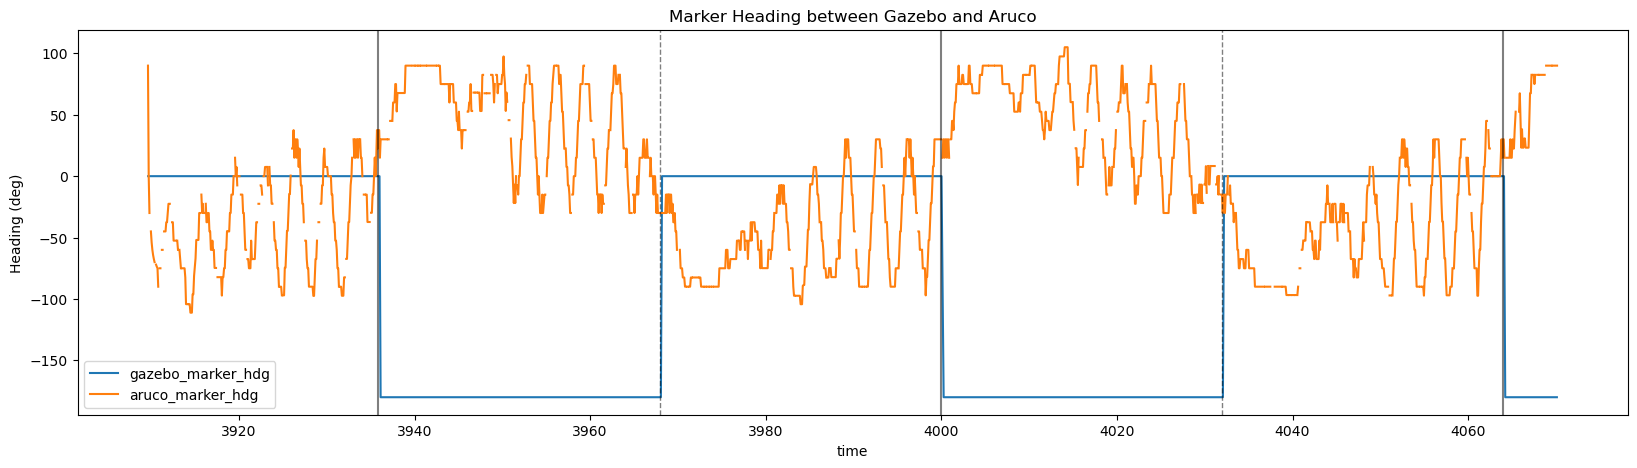

In [157]:
# Marker Heading between Gazebo and Aruco
df_gzstate['marker_hdg'].plot(figsize=(20,5))
iris_data['marker_hdg'].plot(figsize=(20,5))
draw_turnpoint_lines()
plt.legend(['gazebo_marker_hdg', 'aruco_marker_hdg'])
plt.title('Marker Heading between Gazebo and Aruco')
plt.ylabel('Heading (deg)');

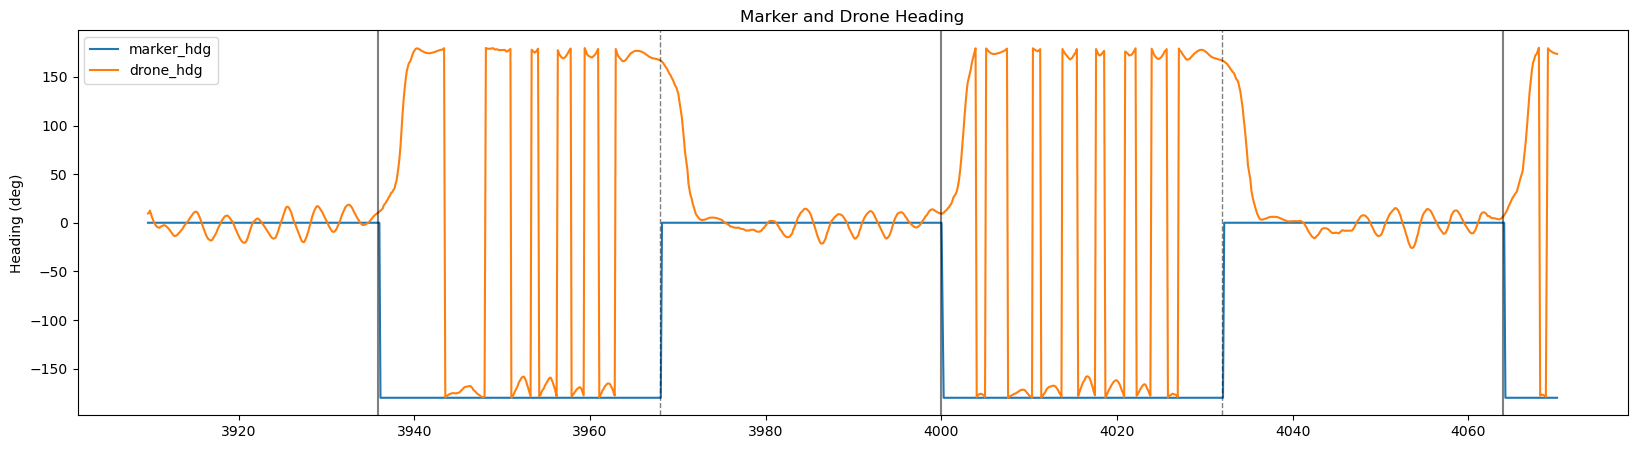

In [158]:
# plot marker and drone heading
df_gzstate['marker_hdg'].plot(figsize=(20,5))
df_gzstate['drone_hdg'].plot(figsize=(20,5))

draw_turnpoint_lines()
plt.title('Marker and Drone Heading')
plt.ylabel('Heading (deg)')
plt.legend(['marker_hdg', 'drone_hdg']);